# Some **downscaled** CMIP6 climate change scenario data 

In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt

In [3]:
import pathlib

In [4]:
import xarray as xr
from cartopy import crs as ccrs

In [5]:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 2

## NASA Global Daily Downscaled Projections (NEX-GDDP-CMIP6) 

https://www.nccs.nasa.gov/services/data-collections/land-based-products/nex-gddp-cmip6

THREDDS server catalog: 
    
https://ds.nccs.nasa.gov/thredds/catalog/AMES/NEX/GDDP-CMIP6/catalog.html 

In [6]:
url = 'https://ds.nccs.nasa.gov/thredds/dodsC/AMES/NEX/GDDP-CMIP6/ACCESS-CM2/historical/r1i1p1f1/tasmax/tasmax_day_ACCESS-CM2_historical_r1i1p1f1_gn_2014.nc'

In [7]:
url

'https://ds.nccs.nasa.gov/thredds/dodsC/AMES/NEX/GDDP-CMIP6/ACCESS-CM2/historical/r1i1p1f1/tasmax/tasmax_day_ACCESS-CM2_historical_r1i1p1f1_gn_2014.nc'

In [8]:
dset = xr.open_dataset(url)

In [9]:
dset

<xarray.Dataset>
Dimensions:  (time: 365, lat: 600, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 2014-01-01T12:00:00 ... 2014-12-31T12:00:00
  * lat      (lat) float64 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    tasmax   (time, lat, lon) float32 ...
Attributes: (12/23)
    activity:                        NEX-GDDP-CMIP6
    contact:                         Dr. Rama Nemani: rama.nemani@nasa.gov, D...
    Conventions:                     CF-1.7
    creation_date:                   2021-10-04T14:01:10.115281+00:00
    frequency:                       day
    institution:                     NASA Earth Exchange, NASA Ames Research ...
    ...                              ...
    disclaimer:                      This data is considered provisional and ...
    external_variables:              areacella
    cmip6_source_id:                 ACCESS-CM2
    cmip6_institution_id:            CSIRO-ARCCSS
    cmip6_license:                   CC-BY-SA 4.0
    DODS_EXTRA.Unlimited_Dimension:  time

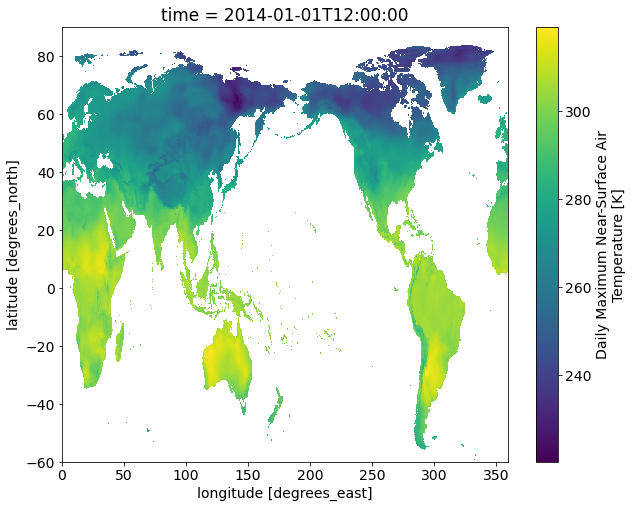

In [10]:
dset['tasmax'][0,:,:].plot()

In [11]:
dset.close()

## Bias-corrected CMIP6 global dataset for dynamical downscaling of the historical and future climate (1979–2100)

Xu, Z., Y. Han, C.-Y. Tam, Z.-L. Yang, and C. Fu, 2021: Bias-corrected CMIP6 global dataset for dynamical downscaling of the historical and future climate (1979–2100). Sci Data, 8, 293, https://doi.org/10.1038/s41597-021-01079-3.


data available for **download** at: 
    
- [https://www.scidb.cn/en/detail?dataSetId=791587189614968832&dataSetType=personal](https://www.scidb.cn/en/detail?dataSetId=791587189614968832&dataSetType=personal)

In [12]:
dpath = pathlib.Path('/media/nicolasf/END19101/data/bias_corrected_CMIP6/')

In [13]:
lfiles = list(dpath.glob("*.nc"))

In [14]:
lfiles.sort()

In [15]:
len(lfiles)

1032

In [16]:
lfiles[0]

PosixPath('/media/nicolasf/END19101/data/bias_corrected_CMIP6/lnd.ssp585.201501.nc')

In [17]:
lfiles[-1]

PosixPath('/media/nicolasf/END19101/data/bias_corrected_CMIP6/lnd.ssp585.210012.nc')

In [18]:
dset = xr.open_mfdataset(lfiles, parallel=True)

In [19]:
dset = dset.drop('time_bnds')

In [20]:
dset = dset[['tas']]

In [21]:
dset 

<xarray.Dataset>
Dimensions:  (time: 1032, lat: 145, lon: 288)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
    height   float64 2.0
Data variables:
    tas      (time, lat, lon) float32 dask.array<chunksize=(1, 145, 288), meta=np.ndarray>
Attributes: (12/47)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Sat Jul 17 21:19:57 2021: cdo -O splityearmon ssp...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60265.0
    ...                     ...
    variant_label:          r1i1p1f1
    version:                v20191108
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/f311686c-1ffa-48f4-aacc-dbd3cfef4a9c
    license:                CMIP6 model data produced by CSIRO is licensed un...
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [22]:
sub = dset.sel(lon=slice(165, 180), lat=slice(-50, -30)).isel(time=-1)

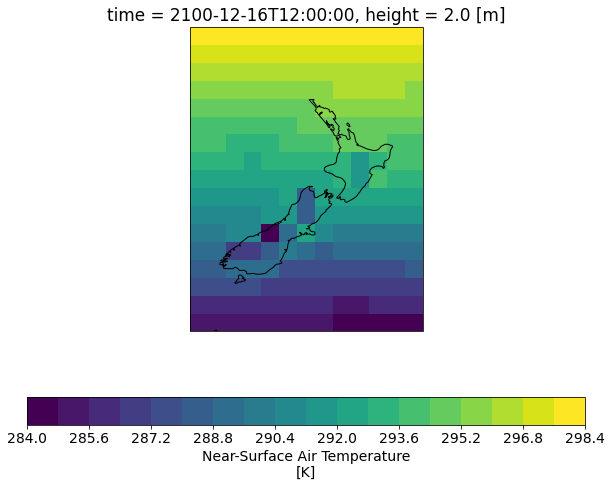

In [23]:
f, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180)))
sub['tas'].plot(ax=ax, levels=20, transform=ccrs.PlateCarree(), cbar_kwargs=dict(orientation='horizontal'))
ax.coastlines()

## Microsoft Planetary's computer CIL Global Downscaled Projections for Climate Impacts Research

see https://planetarycomputer.microsoft.com/dataset/group/cil-gdpcir 

In [24]:
IFrame('https://planetarycomputer.microsoft.com/dataset/group/cil-gdpcir', width=1000, height=700)

NameError: name 'IFrame' is not defined